# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

# Randomly generate a list of 1750 cities. 
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      642
City       642
Country    642
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
cities_df_cleaned = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"


row_count = 1

print("Recieving Data From OpenWeatherMap")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    new_urls = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(new_urls).json()
    
    try:
        cities_df_cleaned.set_value(index, "City", city_data["name"])
        cities_df_cleaned.set_value(index, "Country", city_data["sys"]["country"])
        cities_df_cleaned.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        cities_df_cleaned.set_value(index, "Latitude", city_data["coord"]["lat"])
        cities_df_cleaned.set_value(index, "Longitude", city_data["coord"]["lon"])
        cities_df_cleaned.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        cities_df_cleaned.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        cities_df_cleaned.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("- - - - - - - - - - - - - - ")
        print("City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(new_urls)
        row_count += 1
    except:
        print("Sorry, city not found")

    

Recieving Data From OpenWeatherMap
- - - - - - - - - - - - - - 
City #  1  |  Sao Filipe CV
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=sao+filipe
- - - - - - - - - - - - - - 
City #  2  |  Saint-Philippe CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=saint-philippe


K:\Andaconda\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
K:\Andaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
K:\Andaconda\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
K:\Andaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
K:\Andaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
K:\Andaconda\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is depre

- - - - - - - - - - - - - - 
City #  3  |  Puerto Ayora EC
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=puerto+ayora
- - - - - - - - - - - - - - 
City #  4  |  Henties Bay NA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=henties+bay
- - - - - - - - - - - - - - 
City #  5  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=cape+town
- - - - - - - - - - - - - - 
City #  6  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=rikitea
- - - - - - - - - - - - - - 
City #  7  |  Vaini IN
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=vaini
- - - - - - - - - - - - - - 
City #  8  |  Namibe AO
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=n

- - - - - - - - - - - - - - 
City #  52  |  Severo-Yeniseyskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=severo-yeniseyskiy
- - - - - - - - - - - - - - 
City #  53  |  Les Cayes HT
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=les+cayes
- - - - - - - - - - - - - - 
City #  54  |  Torbay CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=torbay
- - - - - - - - - - - - - - 
City #  55  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=geraldton
- - - - - - - - - - - - - - 
City #  56  |  Fare PF
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=fare
- - - - - - - - - - - - - - 
City #  57  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=

Sorry, city not found
- - - - - - - - - - - - - - 
City #  101  |  Rundu NA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=rundu
- - - - - - - - - - - - - - 
City #  102  |  Portland US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=portland
- - - - - - - - - - - - - - 
City #  103  |  Saint-Louis CH
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=saint-louis
- - - - - - - - - - - - - - 
City #  104  |  Astorga ES
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=astorga
- - - - - - - - - - - - - - 
City #  105  |  Salinopolis BR
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=salinopolis
- - - - - - - - - - - - - - 
City #  106  |  Dongobesh TZ
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf

- - - - - - - - - - - - - - 
City #  149  |  The Pas CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=the+pas
- - - - - - - - - - - - - - 
City #  150  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=san+quintin
- - - - - - - - - - - - - - 
City #  151  |  Terrace CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=terrace
- - - - - - - - - - - - - - 
City #  152  |  Cidreira BR
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=cidreira
- - - - - - - - - - - - - - 
City #  153  |  San Javier ES
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=san+javier
- - - - - - - - - - - - - - 
City #  154  |  Dingle PH
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IM

- - - - - - - - - - - - - - 
City #  197  |  Sikasso ML
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=sikasso
- - - - - - - - - - - - - - 
City #  198  |  Surt LY
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=surt
- - - - - - - - - - - - - - 
City #  199  |  Cap Malheureux MU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=cap+malheureux
- - - - - - - - - - - - - - 
City #  200  |  Makakilo City US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=makakilo+city
- - - - - - - - - - - - - - 
City #  201  |  Tchollire CM
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=tchollire
- - - - - - - - - - - - - - 
City #  202  |  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf

- - - - - - - - - - - - - - 
City #  248  |  Corrales CO
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=corrales
- - - - - - - - - - - - - - 
City #  249  |  Pacific Grove US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=pacific+grove
Sorry, city not found
- - - - - - - - - - - - - - 
City #  250  |  Moyale ET
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=moyale
- - - - - - - - - - - - - - 
City #  251  |  Vao EE
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=vao
- - - - - - - - - - - - - - 
City #  252  |  Helena US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=helena
- - - - - - - - - - - - - - 
City #  253  |  Gao ML
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&uni

Sorry, city not found
- - - - - - - - - - - - - - 
City #  297  |  Dunedin NZ
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=dunedin
- - - - - - - - - - - - - - 
City #  298  |  Victoria BN
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=victoria
- - - - - - - - - - - - - - 
City #  299  |  Araouane ML
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=araouane
- - - - - - - - - - - - - - 
City #  300  |  La Romana DO
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=la+romana
- - - - - - - - - - - - - - 
City #  301  |  Kibala TD
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=kibala
- - - - - - - - - - - - - - 
City #  302  |  Grand Gaube MU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf040046

- - - - - - - - - - - - - - 
City #  346  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=severo-kurilsk
- - - - - - - - - - - - - - 
City #  347  |  Husavik CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=husavik
- - - - - - - - - - - - - - 
City #  348  |  Alexandria US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=alexandria
- - - - - - - - - - - - - - 
City #  349  |  Caxito BR
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=caxito
- - - - - - - - - - - - - - 
City #  350  |  Nara JP
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=nara
- - - - - - - - - - - - - - 
City #  351  |  Razdolinsk RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IM

- - - - - - - - - - - - - - 
City #  395  |  Kati ML
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=kati
- - - - - - - - - - - - - - 
City #  396  |  Bonfim BR
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=bonfim
- - - - - - - - - - - - - - 
City #  397  |  Mounana GA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=mounana
- - - - - - - - - - - - - - 
City #  398  |  Anloga GH
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=anloga
- - - - - - - - - - - - - - 
City #  399  |  Kargasok RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=kargasok
- - - - - - - - - - - - - - 
City #  400  |  Port Lincoln AU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=port+linc

- - - - - - - - - - - - - - 
City #  444  |  Cabo San Lucas MX
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=cabo+san+lucas
- - - - - - - - - - - - - - 
City #  445  |  Hohhot CN
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=hohhot
- - - - - - - - - - - - - - 
City #  446  |  Kiama AU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=kiama
- - - - - - - - - - - - - - 
City #  447  |  Gamba CN
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=gamba
- - - - - - - - - - - - - - 
City #  448  |  Onega RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=onega
- - - - - - - - - - - - - - 
City #  449  |  Kishtwar IN
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=kisht

- - - - - - - - - - - - - - 
City #  492  |  Bonthe SL
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=bonthe
- - - - - - - - - - - - - - 
City #  493  |  Dunmore East IE
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=dunmore+east
- - - - - - - - - - - - - - 
City #  494  |  Rocha UY
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=rocha
- - - - - - - - - - - - - - 
City #  495  |  Olga US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=olga
- - - - - - - - - - - - - - 
City #  496  |  Kenora CA
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=kenora
Sorry, city not found
- - - - - - - - - - - - - - 
City #  497  |  Hovd NO
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IM

- - - - - - - - - - - - - - 
City #  541  |  Chicama PE
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=chicama
- - - - - - - - - - - - - - 
City #  542  |  Algiers US
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=algiers
- - - - - - - - - - - - - - 
City #  543  |  Yanaul RU
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=yanaul
- - - - - - - - - - - - - - 
City #  544  |  Gambela ET
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=gambela
- - - - - - - - - - - - - - 
City #  545  |  Santa Rosalia IT
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL&q=santa+rosalia
- - - - - - - - - - - - - - 
City #  546  |  Cacoal BR
http://api.openweathermap.org/data/2.5/weather?appid=e7b9b852a65dcfedcf0400465a3ecf3b&units=IMPERIAL

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
cities_df_cleaned = cities_df_cleaned.reset_index()
del cities_df_cleaned['index']
cities_df_cleaned.head()


,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Sao Filipe,CV,71.15,14.9,-24.5,83,30,19.06
1,Saint-Philippe,CA,52.47,45.36,-73.48,93,90,3.74
2,Puerto Ayora,EC,77,-0.74,-90.35,95,4,7
3,Henties Bay,NA,55,-22.12,14.28,96,0,5.01
4,Cape Town,ZA,54.61,-33.93,18.42,76,0,4.7


In [20]:
cities_df_cleaned.count()

City                576
Country             576
Temperature (F)     576
Latitude            576
Longitude           576
Humidity (%)        576
Cloudiness (%)      576
Wind Speed (mph)    576
dtype: int64

In [21]:
cities_df_cleaned.to_csv("C:/Users/Ryan/Desktop/API_HW/06-Python-APIs/Instructions/cities_cleaned.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

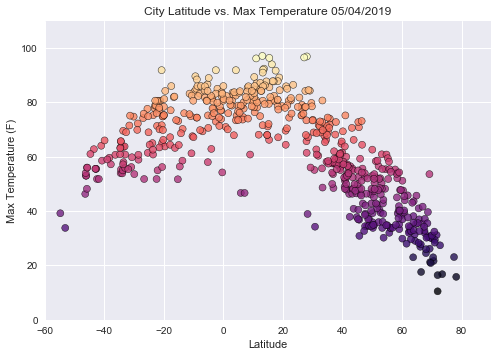

In [22]:
plt.scatter(cities_df_cleaned["Latitude"], 
            cities_df_cleaned["Temperature (F)"], c=cities_df_cleaned["Temperature (F)"],
            edgecolor="black", linewidths = .5, marker="o", 
            cmap='magma', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim([-60, 90])
plt.ylim([0, 110])

# Save the figure
plt.savefig("C:/Users/Ryan/Desktop/API_HW/06-Python-APIs/Instructions/Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

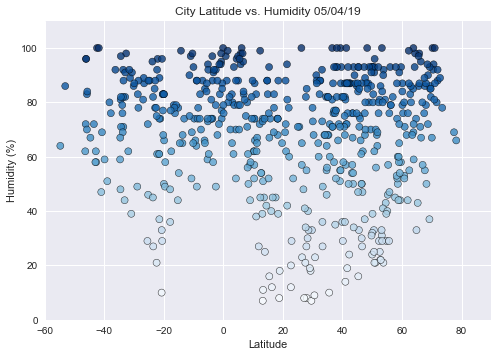

In [23]:
plt.scatter(cities_df_cleaned["Latitude"],
           cities_df_cleaned["Humidity (%)"], c=cities_df_cleaned['Humidity (%)'],
            edgecolor='black', linewidths=.5, marker='o',
            cmap='Blues', alpha=.8, label='City')
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%y')}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim([-60,90])
plt.ylim([0, 110])
          
# Save the figure
plt.savefig("C:/Users/Ryan/Desktop/API_HW/06-Python-APIs/Instructions/Latitude_Humidity.png")

# Show plot
plt.show()          

#### Latitude vs. Cloudiness Plot

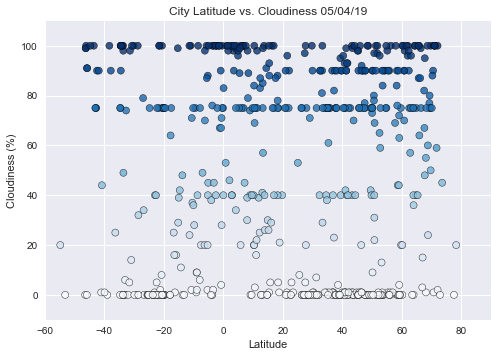

In [24]:
plt.scatter(cities_df_cleaned["Latitude"],
           cities_df_cleaned["Cloudiness (%)"], c=cities_df_cleaned["Cloudiness (%)"],
            edgecolor='black', linewidths=.5, marker='o',
            cmap='Blues', alpha=.8, label='City')
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%y')}")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.xlim([-60,90])
plt.ylim([-10, 110])
          
# Save the figure
plt.savefig("C:/Users/Ryan/Desktop/API_HW/06-Python-APIs/Instructions/Latitude_Cloudiness.png")

# Show plot
plt.show()          

#### Latitude vs. Wind Speed Plot

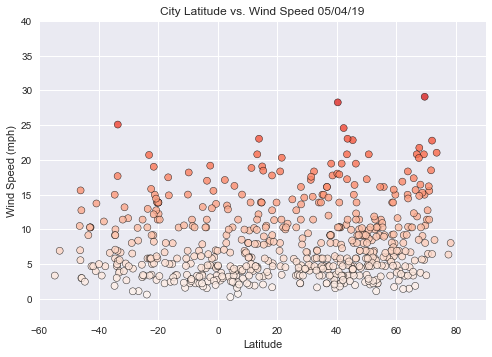

In [25]:
plt.scatter(cities_df_cleaned["Latitude"],
           cities_df_cleaned["Wind Speed (mph)"], c=cities_df_cleaned["Wind Speed (mph)"],
            edgecolor='black', linewidths=.5, marker='o',
            cmap='Reds', alpha=.8, label='City')
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%y')}")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.xlim([-60,90])
plt.ylim([-3, 40])
          
# Save the figure
plt.savefig("C:/Users/Ryan/Desktop/API_HW/06-Python-APIs/Instructions/Latitude_WindSpeed.png")

# Show plot
plt.show()          